In [1]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [5]:
reeses = cv2.imread('DATA/reeses_puffs.png',0)


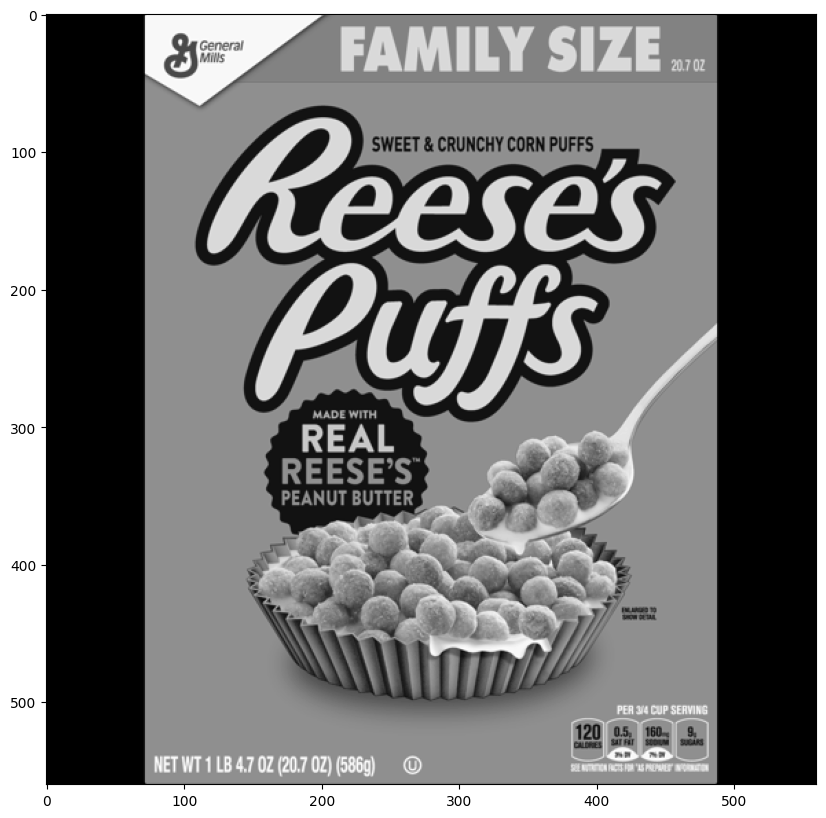

In [6]:
display(reeses)

In [7]:
cereals = cv2.imread('DATA/many_cereals.jpg')

In [8]:
orb = cv2.ORB_create()


In [10]:
kp1,des1 = orb.detectAndCompute(reeses,None)
kp2,des2 = orb.detectAndCompute(cereals,None)

In [11]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING,True)

In [12]:
matches = bf.match(des1,des2)

In [14]:
matches = sorted(matches,key = lambda x:x.distance)

In [15]:
reeses_matches = cv2.drawMatches(reeses,kp1,cereals,kp2,matches[:25],None,flags=2)

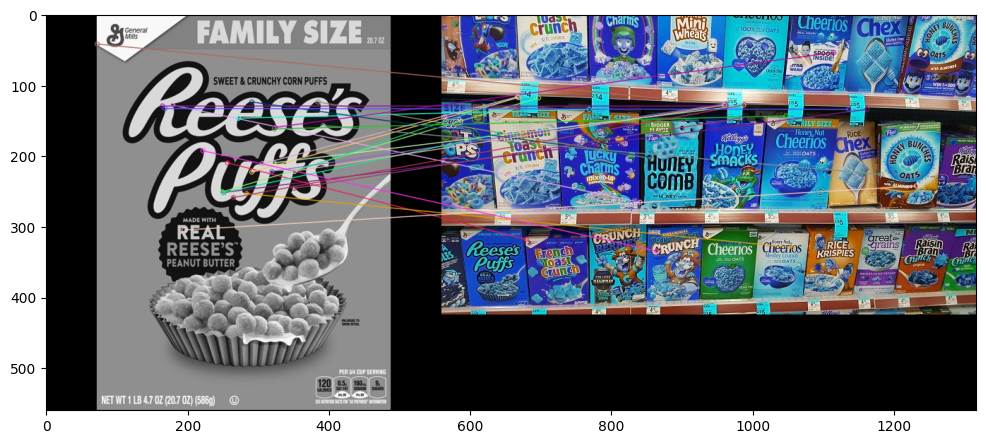

In [16]:
display(reeses_matches)

In [17]:
sift = cv2.xfeatures2d.SIFT_create()

[ WARN:0@669.592] global shadow_sift.hpp:13 SIFT_create DEPRECATED: cv.xfeatures2d.SIFT_create() is deprecated due SIFT tranfer to the main repository. https://github.com/opencv/opencv/issues/16736


In [19]:
kp1,des1 = sift.detectAndCompute(reeses,None)
kp2,des2 = sift.detectAndCompute(cereals,None)

In [20]:
bf = cv2.BFMatcher()

In [23]:
matches = bf.knnMatch(des1,des2,2)

In [25]:
good = []
# ratio test
for match1, match2 in matches:
    if match1.distance < 0.75 * match2.distance:
        good.append([match1])

In [27]:
len(good)

75

In [29]:
sift_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags=2)

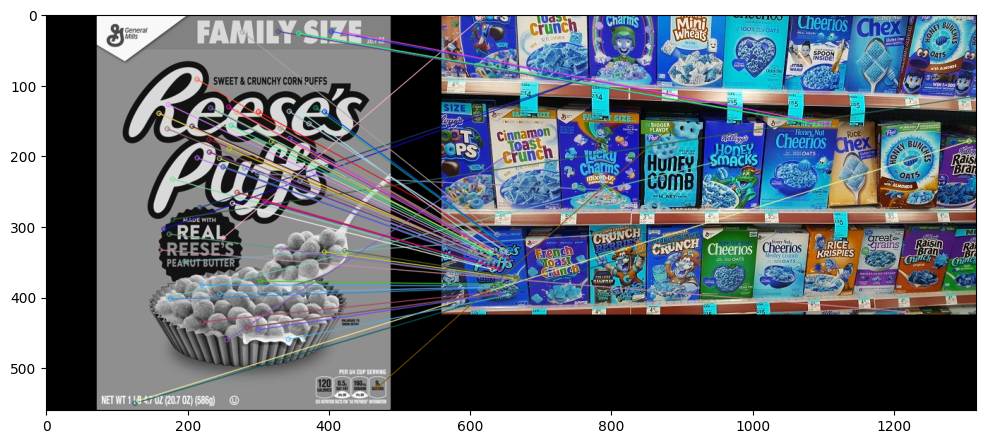

In [30]:
display(sift_matches)

In [31]:
# flane based matcher
sift = cv2.xfeatures2d.SIFT_create()

In [32]:
kp1,des1 = sift.detectAndCompute(reeses,None)
kp2,des2 = sift.detectAndCompute(cereals,None)

In [34]:
# flann find general good matches 
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm=FLANN_INDEX_KDTREE,trees=5)

In [35]:
search_params = dict(checks=50)
flann = cv2.FlannBasedMatcher(index_params, search_params)

In [36]:
matches = flann.knnMatch(des1,des2,2)

In [37]:
good = []
# ratio test
for match1, match2 in matches:
    if match1.distance < 0.75 * match2.distance:
        good.append([match1])

In [38]:
flann_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags=2)

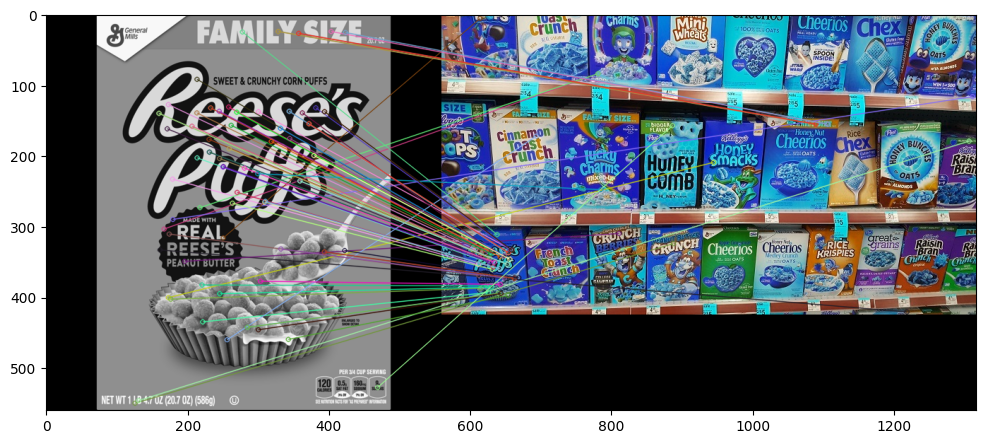

In [39]:
display(flann_matches)